# Install + Downloads

Install DuckDB

In [2]:
!pip uninstall duckdb

!pip install duckdb --pre


Found existing installation: duckdb 0.7.1
Uninstalling duckdb-0.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/duckdb-0.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/duckdb-stubs/__init__.pyi
    /usr/local/lib/python3.10/dist-packages/duckdb.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/duckdb_query_graph/*
Proceed (Y/n)? y
  Successfully uninstalled duckdb-0.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 27.5 MB/s eta 0:00:00


Download:
*   [NYC Taxi Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
*   Weather Dataset



In [3]:
!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2016-01.parquet"
!wget "https://pdet.github.io/assets/data/weather.csv"

--2023-05-09 09:33:04--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2016-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.5, 18.160.201.131, 18.160.201.126, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151251087 (144M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2016-01.parquet’

yellow_tripdata_201 100%[===================>] 144.24M  76.1MB/s    in 1.9s    

2023-05-09 09:33:06 (76.1 MB/s) - ‘yellow_tripdata_2016-01.parquet’ saved [151251087/151251087]

--2023-05-09 09:33:06--  https://pdet.github.io/assets/data/weather.csv
Resolving pdet.github.io (pdet.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pdet.github.io (pdet.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11145 (11K) [text/csv]

In [5]:
import duckdb 

con = duckdb.connect()


# Inspect Datasets

What are the columns in each dataset? What functions we use to create relation on them? How do we preview them?
https://duckdb.org/docs/api/python/relational_api

In [7]:
weather = con.read_csv('weather.csv')

print(weather)

print(weather.columns)

# Do the same for the taxi dataset
taxi = ...

┌────────────┬─────────────────────┬─────────────────────┬───┬───────────────┬───────────┬────────────┐
│    date    │ maximum_temperature │ minimum_temperature │ … │ precipitation │ snow_fall │ snow_depth │
│    date    │        int64        │        int64        │   │    varchar    │  varchar  │  varchar   │
├────────────┼─────────────────────┼─────────────────────┼───┼───────────────┼───────────┼────────────┤
│ 2016-01-01 │                  42 │                  34 │ … │ 0.00          │ 0.0       │ 0          │
│ 2016-01-02 │                  40 │                  32 │ … │ 0.00          │ 0.0       │ 0          │
│ 2016-01-03 │                  45 │                  35 │ … │ 0.00          │ 0.0       │ 0          │
│ 2016-01-04 │                  36 │                  14 │ … │ 0.00          │ 0.0       │ 0          │
│ 2016-01-05 │                  29 │                  11 │ … │ 0.00          │ 0.0       │ 0          │
│ 2016-01-06 │                  41 │                  25 │ … │ 0

Now that we used the Relational API, lets read these files as DuckDB tables
https://duckdb.org/docs/api/python/data_ingestion

In [9]:
res = con.execute("CREATE TABLE weather as SELECT * FROM 'weather.csv'").fetchall()
print (res)

[(366,)]


In [ ]:
# Do the same for the Taxi File

# Queries + Plot

What's the AVG tip value per passenger?
The more people higher the tip?

In [ ]:
import pandas as pd
sql = ''' '''

# Execute with SQL

# Execute with the Relational API

# Use a  Dataframe for plotting
result_df = con.execute(sql).df()

result_df.plot.bar(x="passenger_count", y="tip_amount")

Does the trip distance affects it? What about short trips (< 5 miles) and long trips (> 10 miles)?

How does the Weather impacts it? Colder is higher tips? If it rains?

# Data Cleaning

Let's say that no car in NYC can fit more than 5 passengers.
Consider all trips with more than 5 passengers as dirty, and remove them.


# Predicting Fare Costs with Linear Regression

In [10]:
!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2016-02.parquet"

--2023-05-09 10:00:59--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2016-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.249.90.174, 13.249.90.209, 13.249.90.176, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.249.90.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158113739 (151M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2016-02.parquet’

yellow_tripdata_201 100%[===================>] 150.79M  67.5MB/s    in 2.2s    

2023-05-09 10:01:01 (67.5 MB/s) - ‘yellow_tripdata_2016-02.parquet’ saved [158113739/158113739]



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

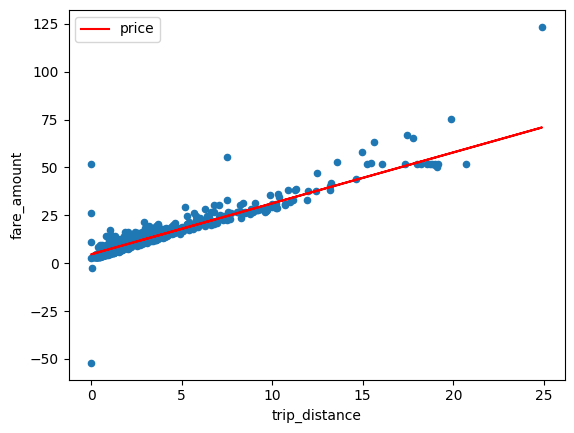

In [12]:
linear_regression_sql = """
  SELECT
      (SUM(trip_distance * fare_amount) - SUM(trip_distance) * SUM(fare_amount) / COUNT(*)) /
      (SUM(trip_distance * trip_distance) - SUM(trip_distance) * SUM(trip_distance) / COUNT(*)) AS beta,
      AVG(fare_amount) AS avg_fare_amount,
      AVG(trip_distance) AS avg_trip_distance
  FROM 
      'yellow_tripdata_2016-01.parquet',
      (
          SELECT 
              AVG(fare_amount) + 3 * STDDEV_SAMP(fare_amount) as max_fare,
              AVG(trip_distance) + 3 * STDDEV_SAMP(trip_distance) as max_distance
          FROM 'yellow_tripdata_2016-01.parquet'
      ) AS sub
  WHERE 
      fare_amount > 0 AND
      fare_amount < sub.max_fare AND 
      trip_distance > 0 AND
      trip_distance < sub.max_distance
  """
res = con.execute(linear_regression_sql).fetchone()

beta, avg_fare_amount, avg_trip_distance = res
alpha = avg_fare_amount - beta * avg_trip_distance

duck_sample = "SELECT trip_distance,fare_amount FROM 'yellow_tripdata_2016-02.parquet' ORDER BY RANDOM() LIMIT 1000;"

# Get a pandas dataframe from duckdb
duck_df_sample = con.execute(duck_sample).fetchdf()

duck_df_sample["price"] = alpha + beta * duck_df_sample["trip_distance"]
ax = duck_df_sample.plot.scatter(x="trip_distance", y="fare_amount")
duck_df_sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")


How far off is our little SQL LR Model?

In [14]:
error_sql = """
SELECT 
  AVG(ABS(price - fare_amount)) AS MAE,
  SQRT(AVG((price - fare_amount) * (price - fare_amount))) AS RMSE
FROM duck_df_sample;
"""

res = con.execute(error_sql).fetchone()

print (f"Mean absolute error: {res[0]}")
print (f"Root mean squared error: {res[1]}")

Mean absolute error: 1.7691545717817025
Root mean squared error (: 3.868878366491136


# Python UDFs

In [23]:
import pyarrow as pa 

def plus_one(x):
    table = pa.lib.Table.from_arrays([x], names=['c0'])
    import pandas as pd
    df = pd.DataFrame(x.to_pandas())
    df['c0'] = df['c0'] + 1
    return pa.lib.Table.from_pandas(df)

con.create_function('bla', plus_one, ['BIGINT'], 'BIGINT', type='arrow')

In [25]:
con.execute('select bla(5::BIGINT)').fetchall()

[(6,)]

# Predicting Tips with Python UDFs

Use Pytorch, Tensorflow, or pure python.
What should impact the tip? Number of passangers? Weather? Distance? Total Fare?

Use the error function to check how far off you are from the predicted value.